<a href="https://colab.research.google.com/github/avinashkr148/Image-detection/blob/main/ANN_Demonstartion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


this is a binary data set


In [ ]:
## Divide the dadaset into dependent and independent features
x=dataset.iloc[:,3:13]                  ## index location
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## feature engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
## Concatenate these variable with dataframe
x=x.drop(['Geography','Gender'],axis=1)  ## just want to drop the coloumn not the rows

In [ ]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
pd.concat([x,geography,gender],axis=1)

NameError: name 'pd' is not defined

In [ ]:
## spliting the dataset into trainig and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
## feature scaling,           why standardscaler is used when the data is normalised and rotate around mean value with some std deviation
## fit.transform is used because of data leackage
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
x_test


array([[ 5.9700000e+02,  3.5000000e+01,  8.0000000e+00, ...,
         1.0000000e+00,  1.0000000e+00,  1.9285267e+05],
       [ 5.2300000e+02,  4.0000000e+01,  2.0000000e+00, ...,
         1.0000000e+00, -5.5067062e-17,  1.2870210e+05],
       [ 7.0600000e+02,  4.2000000e+01,  8.0000000e+00, ...,
         1.0000000e+00,  1.0000000e+00,  7.5732250e+04],
       ...,
       [ 5.7800000e+02,  3.6000000e+01,  1.0000000e+00, ...,
         1.0000000e+00, -5.5067062e-17,  1.4153319e+05],
       [ 6.5000000e+02,  3.4000000e+01,  4.0000000e+00, ...,
         1.0000000e+00,  1.0000000e+00,  1.1276480e+04],
       [ 5.7300000e+02,  3.0000000e+01,  8.0000000e+00, ...,
         1.0000000e+00, -5.5067062e-17,  1.9295060e+05]])

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [ ]:
## part 2 now lets create the ANN using tensorflow and keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  ## dense is used to create the neurons
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## lets initialise the ANN
classifier=Sequential()

In [ ]:
## adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the first hiden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
# adding the second hiden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])  ## we are not using learnig rate because adams use the learning rat of .01

In [ ]:
#early stopin,    code can be tacken directly from he keras documentation
import tensorflow as tf
import keras
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
#train the Neural network
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8571 - loss: 0.3467 - val_accuracy: 0.8493 - val_loss: 0.3721
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8679 - loss: 0.3287 - val_accuracy: 0.8516 - val_loss: 0.3696
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8584 - loss: 0.3404 - val_accuracy: 0.8508 - val_loss: 0.3684
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8539 - loss: 0.3516 - val_accuracy: 0.8489 - val_loss: 0.3711
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8547 - loss: 0.3412 - val_accuracy: 0.8478 - val_loss: 0.3735
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8706 - loss: 0.3248 - val_accuracy: 0.8482 - val_loss: 0.3699
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3370 - val_accuracy: 0.8482 - val_loss: 0.3704
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8628 - loss: 0.3246 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

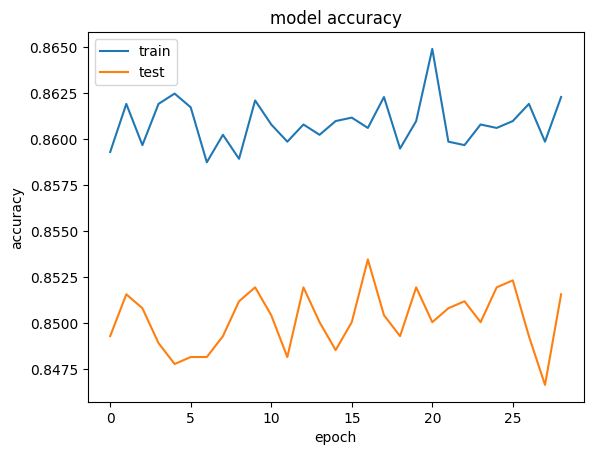

In [ ]:
# summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()


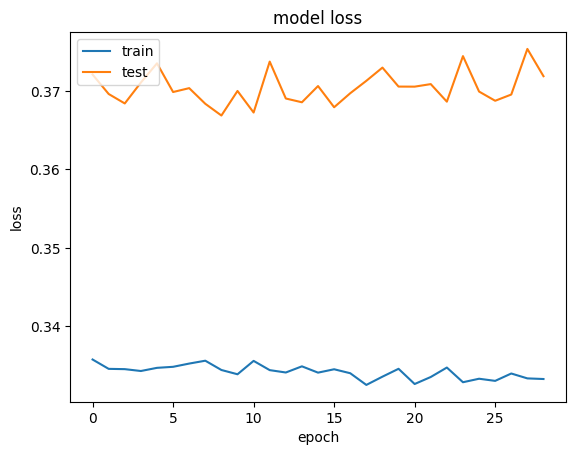

In [ ]:
# summary for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
# making the prediction and evaluating the model
# predicting the test result
y_pred = classifier.predict(x_test)
y_pred = (y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
## make the conusionmatrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[   2, 1593],
       [   2,  403]])

In [ ]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, y_test)

In [ ]:
score


0.2025